# SF Gentrification

This project creates some basic visualizations of San Francisco rent data over time. The data is pulled from [this blog post](https://marthabridegam.com/sf-rent-history-chart/), where the poster did the work of aggregating rent data from a number of other sources. The data being imported from [data.csv](./data.csv) includes the following headers:

- year
- median_rent
- housing_units
- net_new_housing
- employment
- total_wages
- CPI

In [116]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# Load data
f = open('data.csv', 'r')
reader = csv.reader(f)
headers = next(reader, None);
data = { header: [] for header in headers }
for row in reader:
    for h, v in zip(headers, row):
        data[h].append(v)
print(data['median_rent'])

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '35', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '130', '100', '115', '100', '88', '80', '75', '77.5', '75', '85', '95', '115', '110', '115', '120', '130', '135', '130', '135', '145', '165', '175', '200', '205', '195', '215', '220', '250', '260', '315', '310', '375', '422.775', '470.265', '536.751', '536.751', '600', '683.97', '778.95', '826.44', '778.95', '821.691', '897.675', '921.42', '911.922', '888.177', '968.91', '1016.4', '1253.85', '1491.3', '1871.22', '1866.471', '1966.2', '2250', '1740', '1700', '1650', '1625', '1900', '2500', '2300', '2100', '2084', '2599', '2700', '3100', '3300', '3500', '3650']


## Data Cleaning

If we look at Median Rent data and Consumer Price Index (CPI) data, we can see a number of 'NA' entries that need to be cleaned up.

In [126]:
# Clean up missing `median_rent` and `CPI` entries
first_rent_index = data['median_rent'].index('130')
data = {k:v[first_rent_index:] for k, v in data.items()}
cpi_data = data['CPI']
for i in range(len(cpi_data)):
    if cpi_data[i] == 'NA':
        cpi_data[i] = cpi_data[i-1]

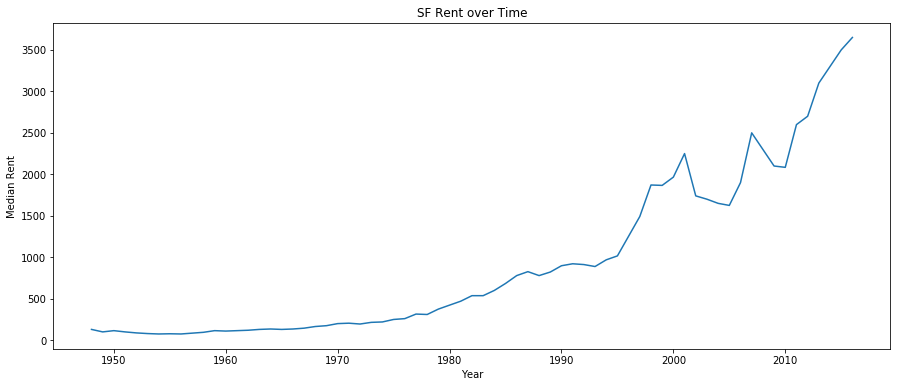

In [127]:
# Plot Median Rent vs. Year
years, median_rents = [int(i) for i in data['year']], [float(i) for i in data['median_rent']]
plt.figure(figsize=(15, 6))
plt.plot(years, median_rents)
plt.xlabel('Year')
plt.ylabel('Median Rent')
plt.title('SF Rent over Time')
plt.show()

## But what about inflation?

So this looks bad, but we still have to compensate for inflation.

In [128]:
def adjust_for_inflation(actual_rent, total_cpi):
    return actual_rent * (1 )

cpis = [float(i) for i in data['CPI']]
adjusted_rents = median_rents[:]
for i in range(len(median_rents)):
    cpi = cpis[i]
    if cpi > 0:
        adjusted_rents[i] = median_rents[i] * (cpis[len(cpis)-1]/cpi)

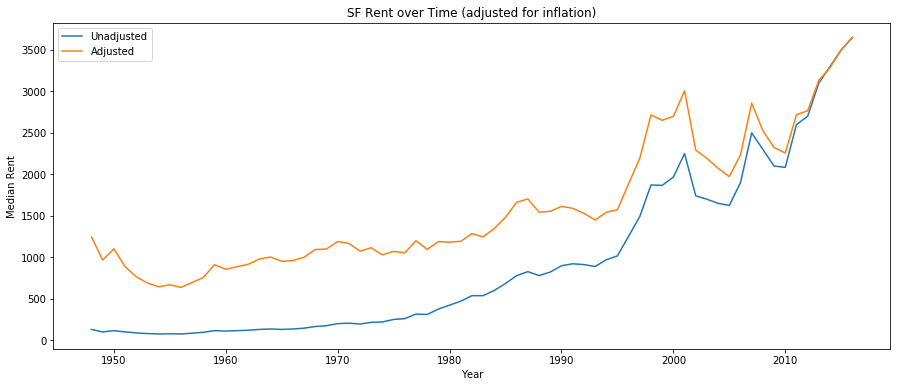

In [129]:
# Plot Median Rent and Adjusted Median Rent vs. Year
plt.figure(figsize=(15, 6))
plt.plot(years, median_rents, label="Unadjusted")
plt.plot(years, adjusted_rents, label="Adjusted")
plt.xlabel('Year')
plt.ylabel('Median Rent')
plt.title('SF Rent over Time (adjusted for inflation)')
plt.legend()
plt.show()

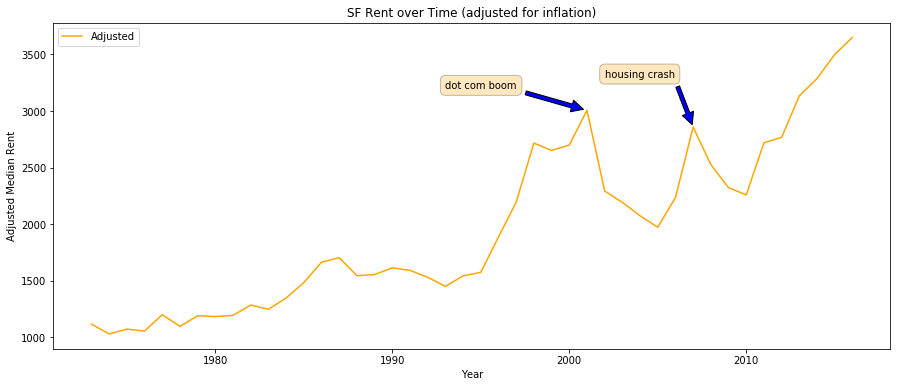

In [130]:
# Let's zoom in
plt.figure(figsize=(15, 6))
plt.plot(years[25:], adjusted_rents[25:], label="Adjusted", color="orange")
plt.xlabel('Year')
plt.ylabel('Adjusted Median Rent')
plt.title('SF Rent over Time (adjusted for inflation)')
plt.annotate('dot com boom', xy=(2001, 3006), xytext=(1993, 3200),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.25))
plt.annotate('housing crash', xy=(2007, 2858), xytext=(2002, 3300),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.25))


plt.legend()
plt.show()

In [ ]:
# Table View
print("Year | Rent")
for year, rent in zip(years, adjusted_rents):
    print(year, "|", rent)